Column names in dataset: Index(['Longitude', 'Latitude', 'Speed', 'Distance', 'Time', 'Acc X', 'Acc Y',
       'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z', 'label',
       'Acc_Magnitude', 'Acc_Change', 'Gyro_Magnitude', 'Gyro_Change',
       'Net_Displacement', 'Speed_Change', 'Heading_Change',
       'Rolling_Acc_Mean', 'Rolling_Acc_STD', 'acc_mean', 'acc_std',
       'gyro_mean', 'gyro_std'],
      dtype='object')
Dataset head:
    Longitude   Latitude  Speed  Distance                 Time     Acc X  \
0  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:12  0.046402   
1  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:12 -0.136978   
2  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:13 -0.045355   
3  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:13  0.242089   
4  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:13 -0.230234   

      Acc Y     Acc Z  Heading    gyro_x  ...  Gyro_Change  Net_Displacement  \
0 -0.137178 -0.282934      3

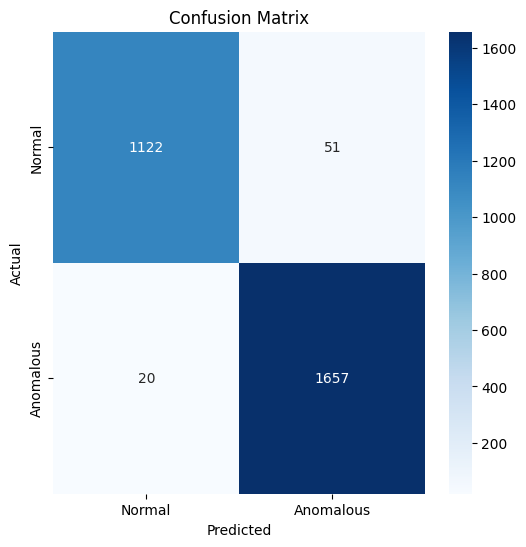

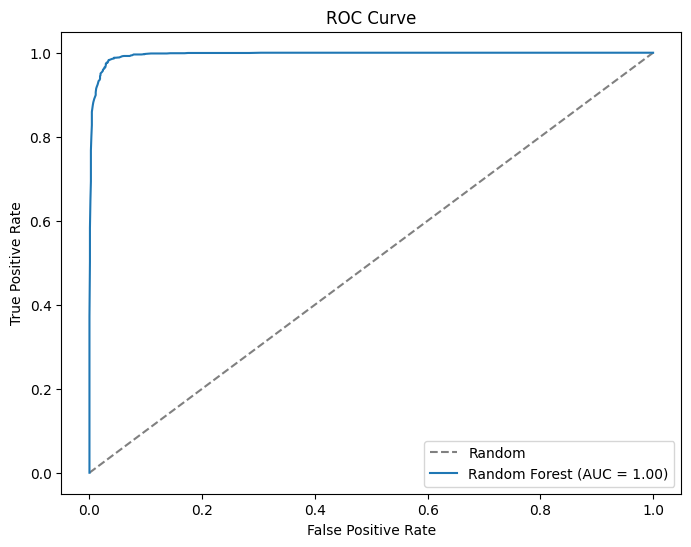

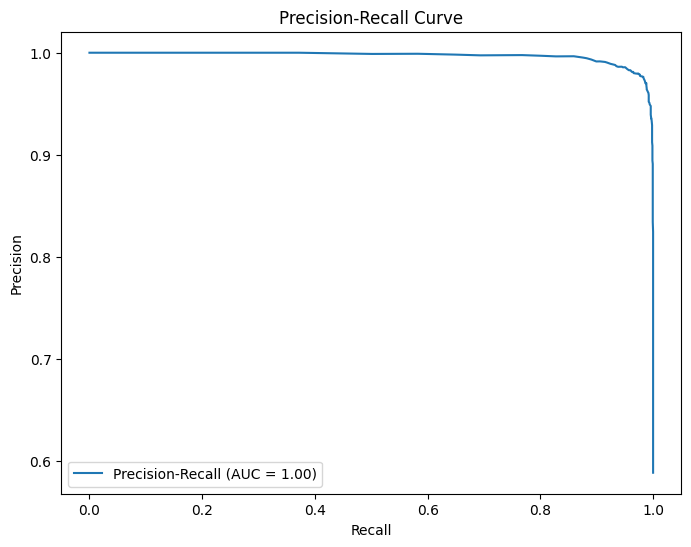

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=10, min_samples

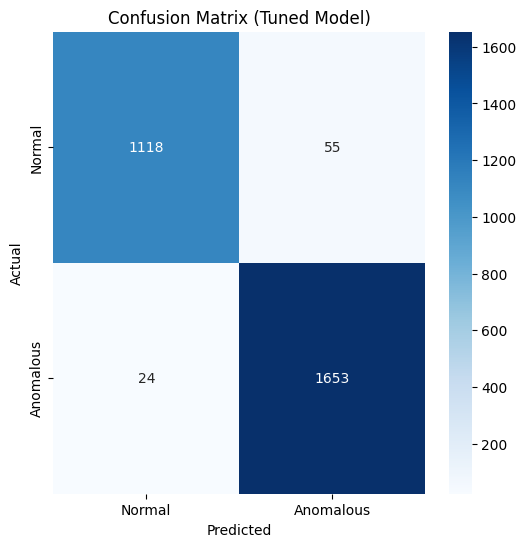

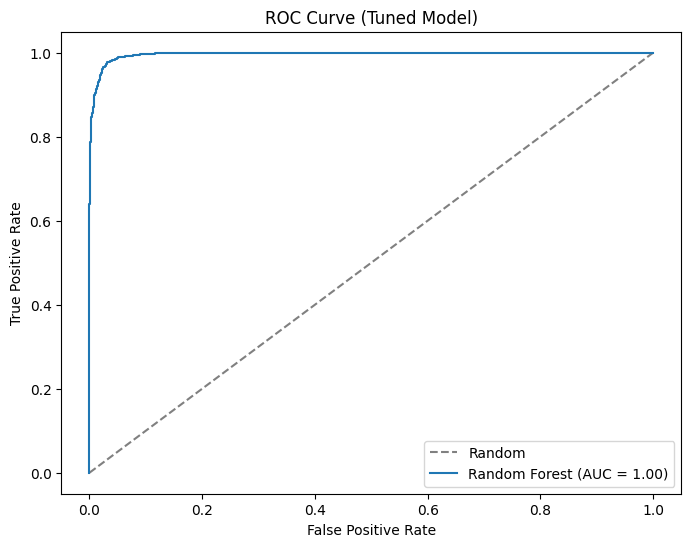

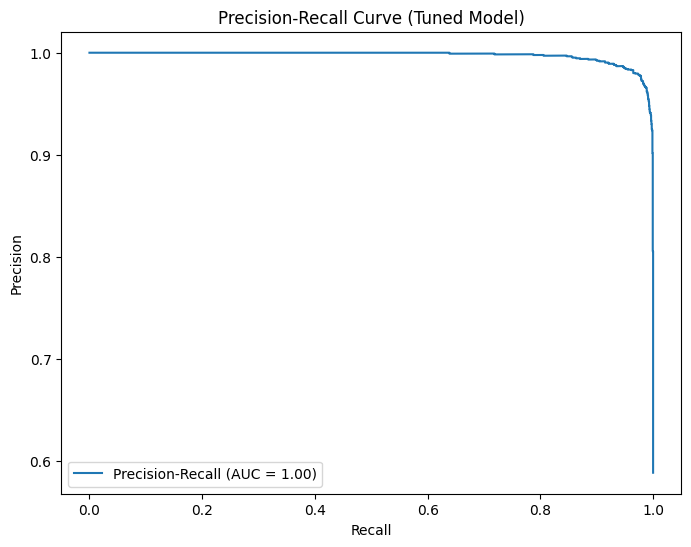

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, recall_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv('Featured_dataset.csv')

# Check column names and dataset head
print("Column names in dataset:", data.columns)
print("Dataset head:\n", data.head())

# 1. Dataset Overview
# Assuming 'label' column exists and contains 'normal' and 'anomalous' as values

# 2. Feature Engineering (Standardizing the data)
# Drop non-numeric columns (e.g., 'Time', 'label') for scaling
X = data.drop(columns=['label', 'Time'])  # Drop target column and non-numeric columns
y = data['label']  # Target column

# Check if there are any other non-numeric columns in X (e.g., categorical columns)
print("Columns in X:", X.columns)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-Test Split
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Model Training (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Model Evaluation
# Predictions on test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 6. Performance Metrics
# Accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# **Recall Score** (Specific focus on Recall)
recall_val = recall_score(y_test, y_pred)
print(f"Recall Score: {recall_val:.4f}")

# 7. Visualizations
# Confusion Matrix Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random', color='grey')
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

# 8. Model Tuning (Hyperparameter Tuning using GridSearchCV)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Re-train with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_best = best_model.predict(X_test)
y_pred_best_prob = best_model.predict_proba(X_test)[:, 1]

# Final Evaluation with the tuned model
accuracy_best = best_model.score(X_test, y_test)
print(f"Final Accuracy (after tuning): {accuracy_best:.4f}")
final_roc_auc = roc_auc_score(y_test, y_pred_best_prob)
print(f"Final ROC-AUC Score: {final_roc_auc:.4f}")
final_pr_auc = auc(recall, precision)
print(f"Final Precision-Recall AUC: {final_pr_auc:.4f}")

# **Recall Score for Tuned Model**
recall_best = recall_score(y_test, y_pred_best)
print(f"Recall Score (Tuned Model): {recall_best:.4f}")

# Visualize the confusion matrix for the tuned model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.title('Confusion Matrix (Tuned Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the ROC curve for the tuned model
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_best_prob)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random', color='grey')
plt.plot(fpr_best, tpr_best, label=f'Random Forest (AUC = {final_roc_auc:.2f})')
plt.title('ROC Curve (Tuned Model)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Visualize the Precision-Recall curve for the tuned model
precision_best, recall_best, _ = precision_recall_curve(y_test, y_pred_best_prob)
plt.figure(figsize=(8,6))
plt.plot(recall_best, precision_best, label=f'Precision-Recall (AUC = {final_pr_auc:.2f})')
plt.title('Precision-Recall Curve (Tuned Model)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

# 9. Insights and Recommendations
# Based on the results from the models and metrics, recommendations might include:
# - Focus on improving recall to capture more anomalies (if anomalies are rare).
# - Use models like Isolation Forest or Autoencoders for better handling of imbalanced anomaly detection tasks.
# - Collect more labeled anomaly data if recall is low.

# 10. Conclusion
# The model's performance has been evaluated using multiple metrics, with a particular focus on recall.
# Hyperparameter tuning has improved the recall and other metrics.
